In [185]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('/Users/tjwilli/presentation.mplstyle')

In [219]:
num_atoms = 40
v_therm = 4
dt = 0.01
t = np.arange(0,8,dt)
v0 = np.random.normal( loc=v_therm,scale=0.1*v_therm,size=num_atoms)
x0 = np.random.uniform(-1,1,size=num_atoms)
y0 = np.random.uniform(-1,1,size=num_atoms)
theta = np.random.uniform(0,2*np.pi,size=num_atoms)
vE = 0.0
#vE = 0.15
#x = []
#y = []
#vx = []
#vy = []
#for i in range(num_atoms):
#    x.append( np.zeros_like(t) )
#    y.append( np.zeros_like(t) )
#    vx.append( np.zeros_like(t) )
#    vy.append( np.zeros_like(t) )
#    x[i][0] = x0[i]
#    y[i][0] = y0[i]
#    vx[i][0] = v_therm * np.cos(theta[i])
#    vy[i][0] = v_therm * np.sin(theta[i])
x = np.zeros( (num_atoms,t.size) )
y = np.zeros_like(x)
vx = np.zeros_like(x)
vy = np.zeros_like(x)

x[:,0] = x0
y[:,0] = y0
vx[:,0] = v0 * np.cos( theta )
vy[:,0] = v0 * np.sin( theta ) 

for i in range(1,t.size):
    xnew = x[:,i-1] + vx[:,i-1] * dt
    ynew = y[:,i-1] + vy[:,i-1] * dt
    outX = np.abs( xnew ) >= 1
    outY = np.abs( ynew ) >= 1
    vx[outX,i] = -vx[outX,i-1] + vE
    vx[~outX,i] = vx[~outX,i-1] + vE
    vy[outY,i] = -vy[outY,i-1]
    vy[~outY,i] = vy[~outY,i-1]
    x[:,i] = x[:,i-1] + vx[:,i] * dt
    y[:,i] = y[:,i-1] + vy[:,i] * dt
    #x[:,i] = xnew
    #y[:,i] = ynew
    #vx[:,i] = vx[:,i-1]
    #vy[:,i] = vy[:,i-1]
    
#for i in range(1,t.size):
#    for i_atm in range(num_atoms):
#        xnew = x[i_atm][i-1] + vx[i_atm][i-1]*dt
#        ynew = y[i_atm][i-1] + vy[i_atm][i-1]*dt
#        x[i_atm][i] = xnew
#        y[i_atm][i] = ynew

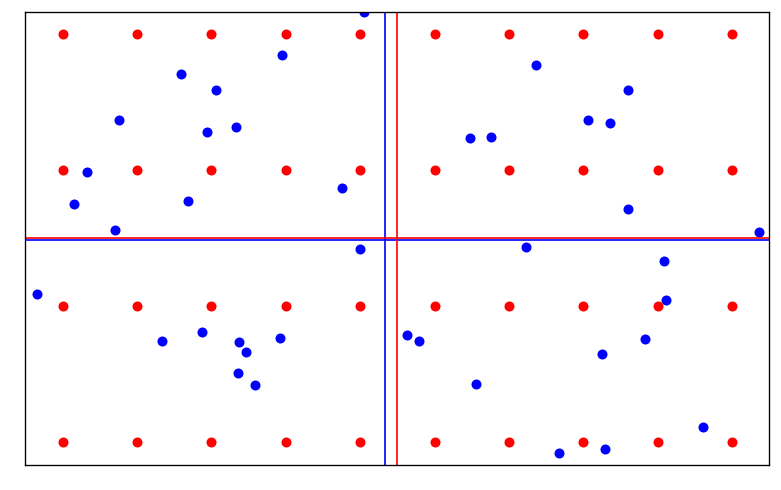

In [220]:
fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1, 1))
scat = plt.scatter([],[],c='blue')
avgX = plt.axvline(c='blue')
avgY = plt.axhline(c='blue')
xN = np.linspace(-.9,.9,10)
yN = np.linspace(-.9,.9,4)
xg,yg = np.meshgrid(xN,yN)
ax.scatter(xg,yg,color='red')
ax.axvline(xg.mean(),color='red')
ax.axhline(yg.mean(),color='red')

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

def init():
    v = ax.axvspan(0,0)
    scat.set_offsets( [[],[]] )
    return scat

def animate(i):
    scat.set_offsets( np.array([x[:,i],y[:,i]]).T ) 
    meanX = x[:,i].mean()
    meanY = y[:,i].mean()
    
    avgX.set_data( [meanX,meanX],[-1,1] )
    avgY.set_data( [-1,1],[meanY,meanY] )
    return scat,avgX,avgY
    
anim = FuncAnimation(fig, animate,
                               frames=t.size, interval=20, blit=True)


In [199]:
num_atoms = 20
xN = np.linspace(-1,1,10)
yN = np.linspace(-1,1,4)
xg,yg = np.meshgrid(xN,yN)

In [221]:
anim.save('drude_E0.mp4')

(0, 20)

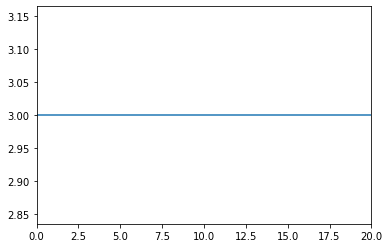

In [158]:
plt.figure()
ax = plt.gca()
v=ax.axhline(3)
#v.set_data( [5,5],[0,1] )
v.set_data([-1,1],[3,3])
plt.xlim(0,20)

(0, 10)

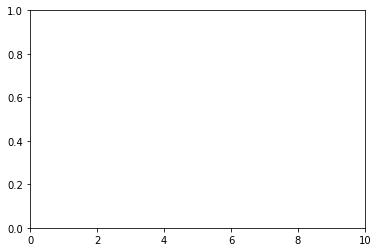

In [150]:
plt.figure()
ax = plt.gca()
v=ax.axvspan(3,5)
v.set_xy( [[3,4],[0,1]])
plt.xlim(0,10)